# Sentiment

## 1. Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm
import swifter

## 2. Loading data

In [3]:
df = pd.read_parquet(r"..\Data\cleaned_parquet\final\P5_final_new.parquet")
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_title_tokens_hf,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[[CLS], potential, impact, health, care, refor...","[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[[CLS], new, jersey, health, promotion, diseas...","[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[[CLS], provide, prevent, ##ive, services, ?, ...","[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[[CLS], cy, ##tore, ##duction, small, int, ##e...","[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[[CLS], racial, differences, access, kidney, t...","[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure]


In [10]:
df.columns

Index(['uid', 'title', 'journal', 'abstract', 'authors', 'affiliations',
       'mesh_terms', 'keywords', 'coi_statement', 'parsed_date',
       'cleaned_title_tokens_simple', 'cleaned_title_tokens_hf',
       'cleaned_abstract_tokens_simple', 'cleaned_abstract_tokens_hf',
       'disease_title_tokens_simple', 'disease_title_tokens_hf',
       'disease_abstract_tokens_simple', 'disease_abstract_tokens_hf',
       'disease_abstract_spacy', 'disease_title_spacy',
       'disease_mesh_terms_spacy'],
      dtype='object')

## 3. Sentiment Analysis (VADER) on abstracts

In [14]:
sia = SentimentIntensityAnalyzer()
df[['neg_vader', 'neu_vader', 'pos_vader', 'compound_vader']] = df['abstract'].swifter.apply(
    lambda text: pd.Series(sia.polarity_scores(str(text)))
)

Pandas Apply:   0%|          | 0/1057871 [00:00<?, ?it/s]

### 3.1. Average score

In [18]:
mean_scores = df[['neg_vader', 'neu_vader', 'pos_vader', 'compound_vader']].mean()

print("Average sentiment scores:")
print(mean_scores)

Average sentiment scores:
neg_vader         0.059812
neu_vader         0.874477
pos_vader         0.065708
compound_vader    0.082011
dtype: float64


We can observe that on average abstracts, as expected, are neutral.

### 3.2. Sentiment Trends Over Time

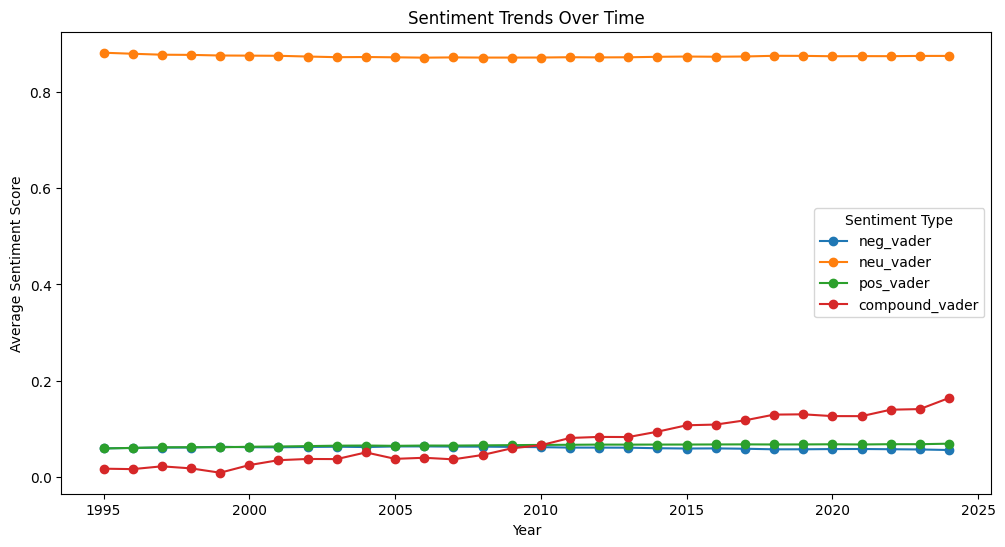

In [19]:
sentiment_per_year = df.groupby(df['parsed_date'].dt.year)[['neg_vader', 'neu_vader', 'pos_vader', 'compound_vader']].mean()

sentiment_per_year.plot(kind='line', figsize=(12, 6), marker='o', title='Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend(title="Sentiment Type")
plt.show()

We can observe that sentiment in abstracts does not change significantly over time. There is only a slight decrease in negative sentiment from 2010 onwards.

### 3.3. Monthly Sentiment Trends

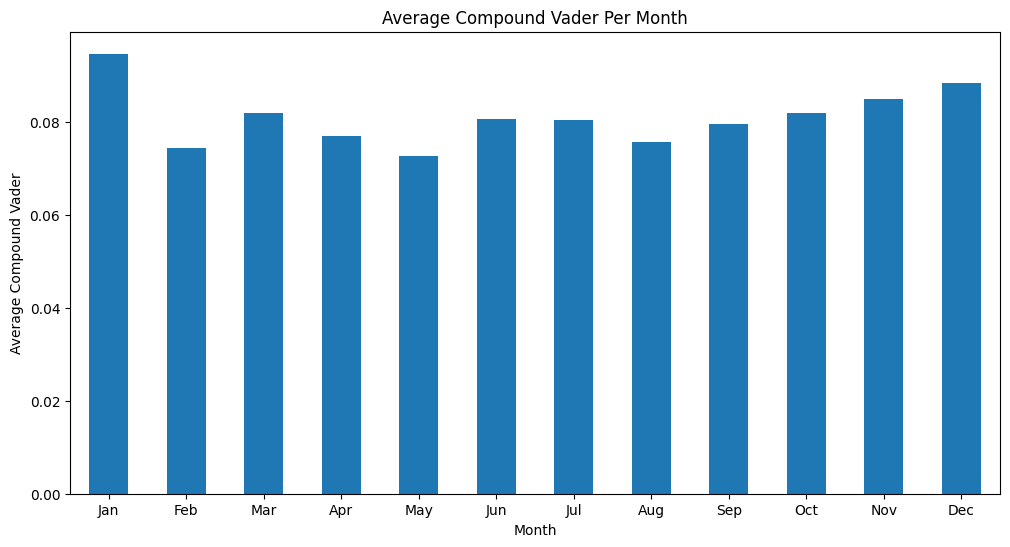

In [ ]:
compound_vader_per_month_avg = df.groupby(df['parsed_date'].dt.month)['compound_vader'].mean()

plt.figure(figsize=(12, 6))
compound_vader_per_month_avg.plot(kind='bar', title='Average Compound Vader Per Month')
plt.xlabel('Month')
plt.ylabel('Average Compound Vader')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

We can observe that any month in a year is not associated with negative sentiment in abstracts. For all of the months, sentiment stays more or less the same.

## 4. Conclusions

1. On average abstracts, as expected, are neutral.

2. Sentiment in abstracts does not change significantly over time. There is only a slight decrease in negative sentiment from 2010 onwards.

3. Any month in a year is not associated with negative sentiment in abstracts. For all of the months, sentiment stays more or less the same.